<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/09linearRegressionSKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case Study - 1 (Marks-10)  

**Implement the Linear Regression on the Diabetes Dataset of the SciKit-Learn. The parameters obtained must be as close as the parameters obtained using Linear Rgression Method of Linear Model available in SciKit Library. Calculate the accuracy of your model with respect to SciKit model**  

## Importing Dataset

[Toy SciKit-Learn Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html)



In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np

In [2]:

# Load the diabetes dataset
diabetes_X, y = datasets.load_diabetes(return_X_y=True)

In [3]:
print(diabetes_X.shape)
print(type(diabetes_X))
print(y.shape)

(442, 10)
<class 'numpy.ndarray'>
(442,)


In [4]:

# Using the jth feature
j=[1,2,3,4]
X = diabetes_X[:, j] # All Rows of jth column
X=X.reshape(diabetes_X.shape[0],len(j)) # To restrict to only desired columns list `j`
print(X.shape)
# print(type(X))
#print(X)



(442, 4)


In [9]:
# Using all the features
X = diabetes_X
print(X.shape)
#print(type(X))
#print(X)

(442, 10)


In [10]:

# Create linear regression object
lr = linear_model.LinearRegression()

# Train the model using the training sets
lr.fit(X, y)

# The coefficients
w_skl=lr.coef_
b_skl=lr.intercept_
print("Coefficients: \n", w_skl)
print("Intercept: \n", b_skl)

Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Intercept: 
 152.1334841628965


In [32]:
X_mf=X.T
nx,m=X_mf.shape
print("nx, m", nx,m)
print("y ", y.shape)
y=y.reshape(1,X_mf.shape[1])
print("y after reshape ", y.shape)
learning_rate=0.001
max_iteration=20000
# print(X_mf,y)
w=np.zeros(nx).reshape(nx,1)
J=np.zeros(max_iteration)
b=0.0
#print(X_mf.shape, y.shape, w.shape,w)
for i in range(max_iteration):
  yhat=np.dot(w.T,X_mf)+b
  # print("yhat ", yhat)
  J[i]=np.dot((yhat-y),(yhat-y).T)*(0.5*m)
  # print("yhat ", yhat)
  dw=(1/m)*np.dot(X_mf,(yhat-y).T)
  db=(1/m)*np.sum((yhat-y), axis=1) # axis=1 : Output rowwise sum 
  w=w-learning_rate*dw
  b=b-learning_rate*db
w_model,b_model=w,b
print("w_model and b_model ", w_model, b_model)

nx, m 10 442
y  (1, 442)
y after reshape  (1, 442)
w_model and b_model  [[ 12.31317479]
 [  2.03555064]
 [ 40.41043803]
 [ 30.16989587]
 [ 13.51478134]
 [ 10.73956664]
 [-26.74239306]
 [ 28.61741478]
 [ 38.59705997]
 [ 25.64406086]] [152.13348385]


(20000,) (20000,)


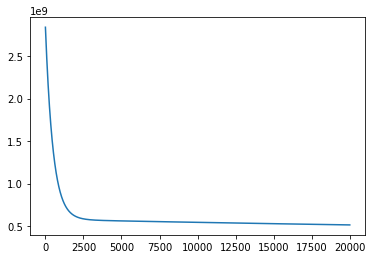

In [33]:
xPlot=np.linspace(1,max_iteration, num=max_iteration)
print(xPlot.shape, J.shape)
plt.plot(xPlot,J)